In [38]:
import pandas as pd
import numpy as np
import nltk
import re
import unicodedata
from nltk.corpus import stopwords,wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from textblob import TextBlob
from sklearn.model_selection import LeaveOneOut, cross_val_score, RepeatedKFold, LeaveOneOut, KFold
import spacy
import pandas as pd
import numpy as np
import nltk
import re
import unicodedata
from nltk.corpus import stopwords,wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from textblob import TextBlob
from sklearn.model_selection import LeaveOneOut, cross_val_score, RepeatedKFold, LeaveOneOut, KFold

%matplotlib inline

In [39]:
# Cargamos los datos
ODS_train_data = pd.read_csv('../dataset/ODScat_345.csv' , encoding='utf-8')
ODS_Test_data = pd.read_csv('../dataset/TestODScat_345.csv' , encoding='utf-8')

# 1. Entendimiento del negocio y enfoque analitico

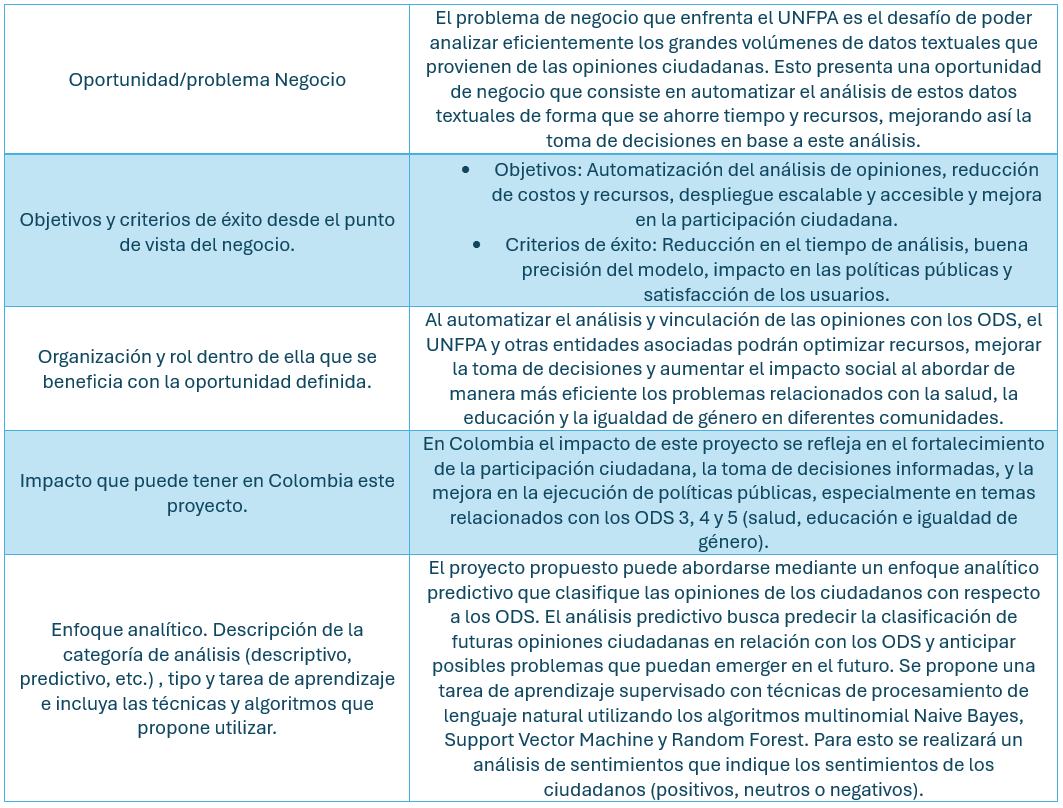


# 2. Entendimiento de los Datos

In [40]:
ODS_train_data.shape

(4049, 2)

In [41]:
ODS_Test_data.shape

(702, 2)

In [42]:
ODS_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4049 entries, 0 to 4048
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Textos_espanol  4049 non-null   object
 1   sdg             4049 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 63.4+ KB


In [43]:
ODS_Test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Textos_espanol  702 non-null    object 
 1   sdg             0 non-null      float64
dtypes: float64(1), object(1)
memory usage: 11.1+ KB


In [44]:
# #Perfilamiento con ydata_profiling
# from ydata_profiling import ProfileReport

# profile = ProfileReport(ODS_train_data, title="Pandas Profiling Report")
# profile

Datos estadísticos

In [45]:
from scipy import stats as st

textos = ODS_train_data.copy()
# Contar caracteres y palabras en la columna 'Textos_espanol'
total_caracteres = ODS_train_data['Textos_espanol'].str.len().sum()
total_palabras = ODS_Train_data['Textos_espanol'].str.split().str.len().sum()

# Imprimir los resultados
print(f'Total de caracteres: {total_caracteres}')
print(f'Total de palabras: {total_palabras}')

#Contar palabras por fila
textos['conteo'] = [len(x) for x in textos['Textos_espanol']]

#Calcular moda media y mediana con scipy
textos['Moda'] = [st.mode([len(word) for word in message.split(' ')], keepdims=True)[0][0] for message in textos['Textos_espanol']]
textos['Mediana'] = [int(np.median([len(word) for word in message.split(' ')])) for message in textos['Textos_espanol']]
textos['Media'] = [int(np.mean([len(word) for word in message.split(' ')])) for message in textos['Textos_espanol']]
textos['Max'] = [[max([len(x) for x in i.split(' ')])][0] for i in textos['Textos_espanol']]
textos['Min'] = [[min([len(x) for x in i.split(' ')])][0] for i in textos['Textos_espanol']]
textos['Rango'] = textos['Max'] - textos['Min']
textos['Desviacion'] = [int(np.std([len(word) for word in message.split(' ')])) for message in textos['Textos_espanol']]
textos['Varianza'] = [int(np.var([len(word) for word in message.split(' ')])) for message in textos['Textos_espanol']]
textos['Palabra_mas_frecuente'] = [Counter(message.split()).most_common(1)[0][0] for message in textos['Textos_espanol']]
textos['Frecuencia_palabra_mas_frecuente'] = [Counter(message.split()).most_common(1)[0][1] for message in textos['Textos_espanol']]
textos['Palabra_menos_frecuente'] = [Counter(message.split()).most_common()[-1][0] for message in textos['Textos_espanol']]
textos['Frecuencia_palabra_menos_frecuente'] = [Counter(message.split()).most_common()[-1][1] for message in textos['Textos_espanol']]

textos


Total de caracteres: 2832812
Total de palabras: 446612


,Textos_espanol,sdg,conteo,Moda,Mediana,Media,Max,Min,Rango,Desviacion,Varianza,Palabra_mas_frecuente,Frecuencia_palabra_mas_frecuente,Palabra_menos_frecuente,Frecuencia_palabra_menos_frecuente
0,"Por ejemplo, el nÃºmero de consultas externas ...",3,944,2,3,4,18,1,17,3,11,de,16,SP.,1
1,"En 2007, el gobierno central financió directam...",3,476,2,4,5,14,1,13,3,9,del,4,hospitales.,1
2,"Claramente, hay muchos otros factores en juego...",3,1207,2,5,5,15,1,14,3,11,de,12,ODM.,1
3,"Por ejemplo, el estado australiano de Victoria...",3,1090,2,5,5,17,1,16,3,13,de,15,interregionales.,1
4,"El consumo anual de alcohol se estima en 15,7 ...",3,895,2,3,4,13,1,12,2,6,de,19,15.,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4044,"Para ello, identificará las cuestiones de géne...",5,822,2,4,5,16,1,15,3,14,de,12,género.,1
4045,La participación de las mujeres en roles de li...,5,514,2,5,5,16,1,15,3,12,de,9,Presidencial.,1
4046,"Según el WEF, según las tendencias de 2016, po...",5,445,2,5,5,17,1,16,3,12,el,4,países.,1
4047,"Sirve como recurso y foro para las agencias, c...",5,1017,2,4,5,15,1,14,3,10,de,17,Justicia.,1


Contando la frecuencia de cada palabra y determinando las más repetidas

In [46]:
# Unir todos los textos en una sola cadena
all_text = ' '.join(ODS_train_data['Textos_espanol'])

# Limpiar y dividir el texto en palabras
words = re.findall(r'\b\w+\b', all_text.lower())

# Contar la frecuencia de cada palabra
word_freq = Counter(words)

# Mostrar las 10 palabras más comunes
print(word_freq.most_common(10))

[('de', 37886), ('la', 20822), ('en', 15518), ('y', 15135), ('los', 13629), ('el', 11728), ('las', 10382), ('a', 8518), ('que', 8462), ('para', 5966)]


Distribución de la longitud de las palabras y KDE

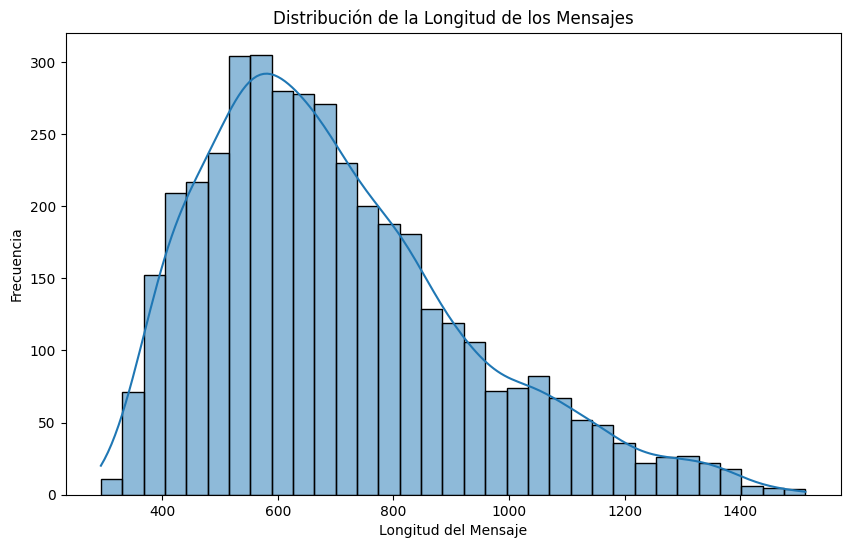

Asimetría: 0.8350624465488269, Curtosis: 0.32436533938895895


In [47]:
# 5. Visualización de la Distribución Usando Histogramas y KDE
plt.figure(figsize=(10, 6))
sns.histplot(textos['conteo'], kde=True)
plt.title('Distribución de la Longitud de los Mensajes')
plt.xlabel('Longitud del Mensaje')
plt.ylabel('Frecuencia')
plt.show()

# 6. Cálculo de la Asimetría (Skewness) y Curtosis (Kurtosis)
skewness = textos['conteo'].skew()
kurtosis = textos['conteo'].kurtosis()
print(f"Asimetría: {skewness}, Curtosis: {kurtosis}")

Distribución el número de palabras en los textos

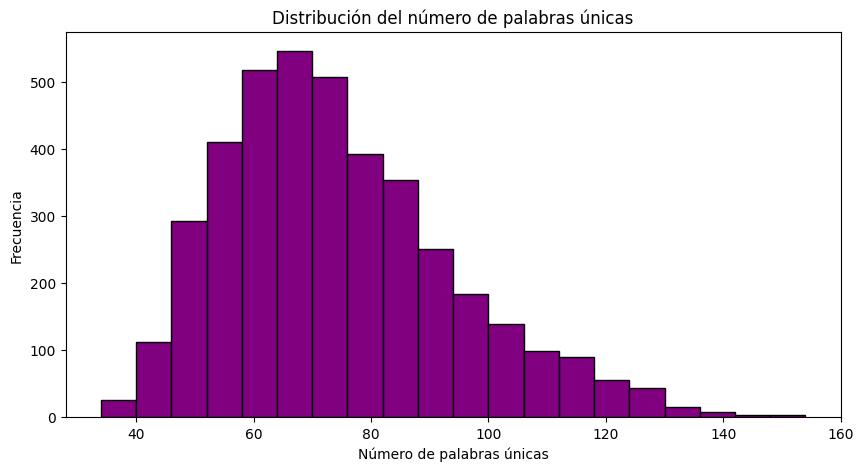

Asimetría: 0.8350624465488269, Curtosis: 0.32436533938895895


In [48]:
# Contar el número de palabras únicas en cada mensaje
textos['palabras_unicas'] = textos['Textos_espanol'].apply(lambda x: len(set(x.split())))

# Histograma de la distribución de palabras únicas
plt.figure(figsize=(10, 5))
plt.hist(textos['palabras_unicas'], bins=20, color='purple', edgecolor='black')
plt.title('Distribución del número de palabras únicas')
plt.xlabel('Número de palabras únicas')
plt.ylabel('Frecuencia')
plt.show()
#Imprimir la asimetría y curtosis
print(f"Asimetría: {skewness}, Curtosis: {kurtosis}")

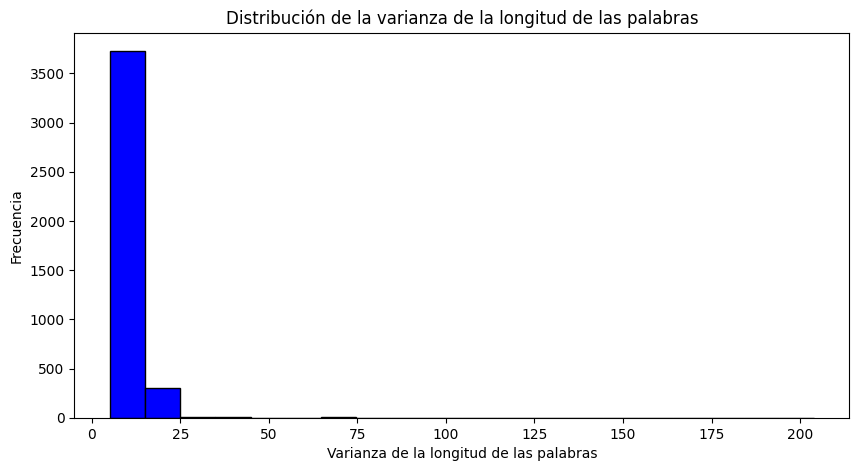

In [49]:
# Histograma de la distribución de la varianza de la longitud de las palabras
plt.figure(figsize=(10, 5))
plt.hist(textos['Varianza'], bins=20, color='blue', edgecolor='black')
plt.title('Distribución de la varianza de la longitud de las palabras')
plt.xlabel('Varianza de la longitud de las palabras')
plt.ylabel('Frecuencia')
plt.show()

N-Gramas más comunes en las palabras

In [50]:
# Función para mostrar los n-gramas más comunes
def mostrar_ngramas(corpus, ngram_range=(2, 2), num=10):
    vec = CountVectorizer(ngram_range=ngram_range).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:num]

# Mostrar los 10 bigramas más comunes
print(mostrar_ngramas(textos['Textos_espanol'], ngram_range=(2, 2), num=10))

# Mostrar los 10 trigramas más comunes
print(mostrar_ngramas(textos['Textos_espanol'], ngram_range=(3, 3), num=10))

[('de la', 5300), ('de los', 3653), ('de las', 2614), ('en la', 2504), ('en el', 2201), ('las mujeres', 2105), ('de género', 1301), ('en los', 1123), ('de salud', 909), ('en las', 879)]
[('de las mujeres', 880), ('de la ocde', 643), ('de género en', 341), ('igualdad de género', 332), ('países de la', 316), ('de los estudiantes', 313), ('la igualdad de', 294), ('las mujeres en', 281), ('de la salud', 280), ('la mayoría de', 266)]


Nube de palabras más comunes

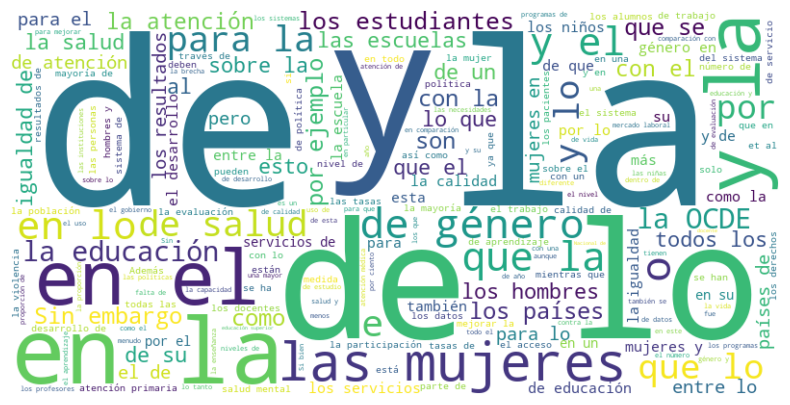

In [51]:
# Generar una nube de palabras
# Unir todos los textos en una sola cadena
all_text = ' '.join(ODS_train_data['Textos_espanol'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Análisis de sentimientos

Eje X (Sentimiento): Representa los valores de sentimiento. Estos valores generalmente oscilan entre -1 y 1:

* Valores negativos: Indican sentimientos negativos.
* Valores cercanos a 0: Indican sentimientos neutros.
* Valores positivos: Indican sentimientos positivos.

Eje Y (Frecuencia): Representa la cantidad de textos que tienen un determinado valor de sentimiento.

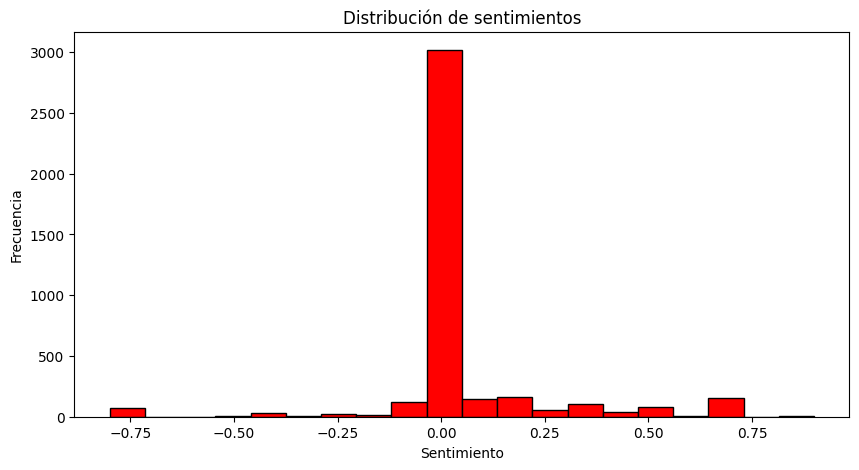

In [52]:
# Función para obtener el sentimiento de un texto
def obtener_sentimiento(texto):
    blob = TextBlob(texto)
    return blob.sentiment.polarity

# Aplicar la función a la columna de textos
textos['sentimiento'] = textos['Textos_espanol'].apply(obtener_sentimiento)

# Histograma de la distribución de sentimientos
plt.figure(figsize=(10, 5))
plt.hist(textos['sentimiento'], bins=20, color='red', edgecolor='black')
plt.title('Distribución de sentimientos')
plt.xlabel('Sentimiento')
plt.ylabel('Frecuencia')
plt.show()

# 3. Preparación de datos

In [53]:
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\PC2\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PC2\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC2\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\PC2\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\PC2\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [74]:
# from sklearn.base import BaseEstimator, TransformerMixin
# from sklearn.pipeline import Pipeline

# # Cargamos el modelo de spaCy
# nlp = spacy.load('es_core_news_sm')

# # Clase personalizada para el preprocesamiento del texto
# class TextPreprocessor(BaseEstimator, TransformerMixin):
#     def __init__(self):
#         pass

#     def clean_text(self, text):
#         replacements = {
#             'Ã¡': 'á', 'Ã©': 'é', 'Ã­': 'í', 'Ã³': 'ó', 'Ãº': 'ú', 'Ã±': 'ñ',
#             'Ã': 'í', 'Â': '', 'Ã¼': 'ü', 'â': '', '€': '', '™': ''
#         }
#         for old, new in replacements.items():
#             text = text.replace(old, new)
#         text = re.sub(r'[^a-zA-ZáéíóúñÁÉÍÓÚÑ\s]', '', text)
#         return text

#     def remove_non_ascii(self, words):
#         new_words = []
#         for word in words:
#             if word is not None:
#                 new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
#                 new_words.append(new_word)
#         return new_words

#     def to_lowercase(self, words):
#         return [word.lower() for word in words if word is not None]

#     def remove_punctuation(self, words):
#         new_words = []
#         for word in words:
#             if word is not None:
#                 new_word = re.sub(r'[^\w\s]', '', word)
#                 if new_word != '':
#                     new_words.append(new_word)
#         return new_words

#     def remove_stopwords(self, words):
#         stop_words = set(stopwords.words('spanish'))
#         return [word for word in words if word is not None and word.lower() not in stop_words]

#     def spacy_lemmatize(self, text):
#         doc = nlp(text)
#         return ' '.join([token.lemma_ for token in doc if not token.is_stop])

#     def preprocess_text(self, text):
#         if not isinstance(text, str):
#             return ''
        
#         text = self.clean_text(text)
#         words = word_tokenize(text)
#         words = self.to_lowercase(words)
#         words = self.remove_punctuation(words)
#         words = self.remove_non_ascii(words)
#         words = self.remove_stopwords(words)
        
#         # Volvemos a juntar las palabras y aplicamos lematización
#         text = ' '.join(words)
#         return self.spacy_lemmatize(text)

#     def fit(self, X, y=None):
#         return self

#     def transform(self, X, y=None):
#         return X.apply(self.preprocess_text)

# # Cargamos los datos (esto es solo un ejemplo, asegúrate de cargar tus datasets reales)
# text_cleaned = ODS_train_data.copy()
# text_cleaned_test = ODS_Test_data.copy()

# # Dividimos los datos en entrenamiento y prueba
# X_train, X_test, y_train, y_test = train_test_split(
#     text_cleaned['Textos_espanol'], text_cleaned['sdg'], test_size=0.2, random_state=42)

# # Definimos el pipeline con el preprocesamiento y el modelo
# pipeline_nb = Pipeline([
#     ('preprocessor', TextPreprocessor()),  # Preprocesamiento personalizado
#     ('vectorizer', TfidfVectorizer(ngram_range=(1, 2))),  # Convertir texto en vectores
#     ('classifier', MultinomialNB())  # Modelo de Naive Bayes
# ])

# pipeline_svc = Pipeline([
#     ('preprocessor', TextPreprocessor()),  # Preprocesamiento personalizado
#     ('vectorizer', TfidfVectorizer(ngram_range=(1, 2))),  # Convertir texto en vectores
#     ('classifier', SVC(kernel='linear'))  # Modelo SVM
# ])

# pipeline_rf = Pipeline([
#     ('preprocessor', TextPreprocessor()),  # Preprocesamiento personalizado
#     ('vectorizer', TfidfVectorizer(ngram_range=(1, 2))),  # Convertir texto en vectores
#     ('classifier', RandomForestClassifier(random_state=42, n_estimators=100))  # Modelo Random Forest
# ])

In [88]:
from preprocessing import TextPreprocessor  # Importa la clase desde el archivo externo
from sklearn.pipeline import Pipeline

text_cleaned = ODS_train_data.copy()
text_cleaned_test = ODS_Test_data.copy()

# Dividimos los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    text_cleaned['Textos_espanol'], text_cleaned['sdg'], test_size=0.2, random_state=42)

# Definir los pipelines
pipeline_nb = Pipeline([
    ('preprocessor', TextPreprocessor()),  # Preprocesamiento personalizado
    ('vectorizer', TfidfVectorizer(ngram_range=(1, 2))),
    ('classifier', MultinomialNB())
])

pipeline_svm = Pipeline([
    ('preprocessor', TextPreprocessor()),
    ('vectorizer', TfidfVectorizer(ngram_range=(1, 2))),
    ('classifier', SVC(kernel='linear'))
])

pipeline_rf = Pipeline([
    ('preprocessor', TextPreprocessor()),
    ('vectorizer', TfidfVectorizer(ngram_range=(1, 2))),
    ('classifier', RandomForestClassifier(random_state=42, n_estimators=100))
])


# 4. Modelado y Evaluación

# 4.1 Creación de modelos

In [89]:
# Entrenar y evaluar el modelo Naive Bayes
pipeline_nb.fit(X_train, y_train)
y_pred_nb = pipeline_nb.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {accuracy_nb}")

# Entrenar y evaluar el modelo SVM
pipeline_svm.fit(X_train, y_train)
y_pred_svm = pipeline_svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm}")

# Entrenar y evaluar el modelo Random Forest
pipeline_rf.fit(X_train, y_train)
y_pred_rf = pipeline_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")

Naive Bayes Accuracy: 0.9740740740740741
SVM Accuracy: 0.9851851851851852
Random Forest Accuracy: 0.9654320987654321


In [90]:
# Predicciones con Naive Bayes
y_test_pred_nb = pipeline_nb.predict(text_cleaned_test['Textos_espanol'])

# Predicciones con SVM
y_test_pred_svm = pipeline_svm.predict(text_cleaned_test['Textos_espanol'])

# Predicciones con Random Forest
y_test_pred_rf = pipeline_rf.predict(text_cleaned_test['Textos_espanol'])

In [91]:
from preprocessing import TextPreprocessor  # Importa la clase desde el archivo externo
import joblib

# Guardar los pipelines entrenados
joblib.dump(pipeline_nb, 'pipeline_nb.pkl')
joblib.dump(pipeline_svm, 'pipeline_svm.pkl')
joblib.dump(pipeline_rf, 'pipeline_rf.pkl')


['pipeline_rf.pkl']